In [1]:
import pandas as pd
import seaborn as sns
import calendar
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import animation
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
cv = pd.read_csv("../input/covid19-weekly-trends-in-europe/COVID-19 WEEKLY TRENDS IN EUROPE(3).csv")
cv.head()

,"Country, Other",Cases in the last 7 days,Cases in the preceding 7 days,Weekly Case % Change,Cases in the last 7 days/1M pop,Deaths in the last 7 days,Deaths in the preceeding 7 days,Weekly Death % Change,Deaths in the last 7 days/1M pop,Population
0,UK,581035,358200,62.0,8494,784,831,-6.0,11,68409175
1,France,370196,342156,8.0,5653,1043,947,10.0,16,65485446
2,Germany,274730,340547,-19.0,3264,2652,2678,-1.0,32,84177021
3,Russia,195358,212705,-8.0,1338,7618,8142,-6.0,52,146026290
4,Spain,195239,104178,87.0,4173,309,265,17.0,7,46781353


In [3]:
cv.shape

(47, 10)

In [4]:
cv.isnull().sum()

Country, Other                      0
Cases in the last 7 days            0
Cases in the preceding 7 days       0
Weekly Case % Change                0
Cases in the last 7 days/1M pop     0
Deaths in the last 7 days           0
Deaths in the preceeding 7 days     0
Weekly Death % Change               0
Deaths in the last 7 days/1M pop    0
Population                          0
dtype: int64

In [5]:
cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country, Other                    47 non-null     object 
 1   Cases in the last 7 days          47 non-null     int64  
 2   Cases in the preceding 7 days     47 non-null     int64  
 3   Weekly Case % Change              47 non-null     float64
 4   Cases in the last 7 days/1M pop   47 non-null     int64  
 5   Deaths in the last 7 days         47 non-null     int64  
 6   Deaths in the preceeding 7 days   47 non-null     int64  
 7   Weekly Death % Change             47 non-null     float64
 8   Deaths in the last 7 days/1M pop  47 non-null     int64  
 9   Population                        47 non-null     int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 3.8+ KB


* One categorical variable- `Country/Other` while the others are numerical variables

# Descriptive Statistics

In [6]:
cv.describe().T.style.background_gradient(cmap="flag")

,count,mean,std,min,25%,50%,75%,max
Cases in the last 7 days,47.000000,56630.276596,109977.445363,271.000000,1946.500000,11032.000000,53767.000000,581035.000000
Cases in the preceding 7 days,47.000000,53074.170213,90362.177124,164.000000,2056.500000,11061.000000,53570.500000,358200.000000
Weekly Case % Change,47.000000,4.829787,36.659609,-41.000000,-18.500000,-7.000000,15.500000,143.000000
Cases in the last 7 days/1M pop,47.000000,4559.787234,3430.048111,262.000000,2279.500000,3898.000000,6165.500000,16453.000000
Deaths in the last 7 days,47.000000,533.893617,1240.390476,0.000000,16.500000,123.000000,471.000000,7618.000000
Deaths in the preceeding 7 days,47.000000,569.404255,1317.654894,0.000000,24.000000,122.000000,516.500000,8142.000000
Weekly Death % Change,47.000000,-2.489362,55.483594,-100.000000,-21.500000,-6.000000,4.000000,200.000000
Deaths in the last 7 days/1M pop,47.000000,31.744681,29.046790,0.000000,11.000000,22.000000,44.500000,120.000000
Population,47.000000,15920296.765957,28173055.849092,382.000000,984374.000000,5483420.000000,10543229.500000,146026290.000000


# Exploratory Data Analysis

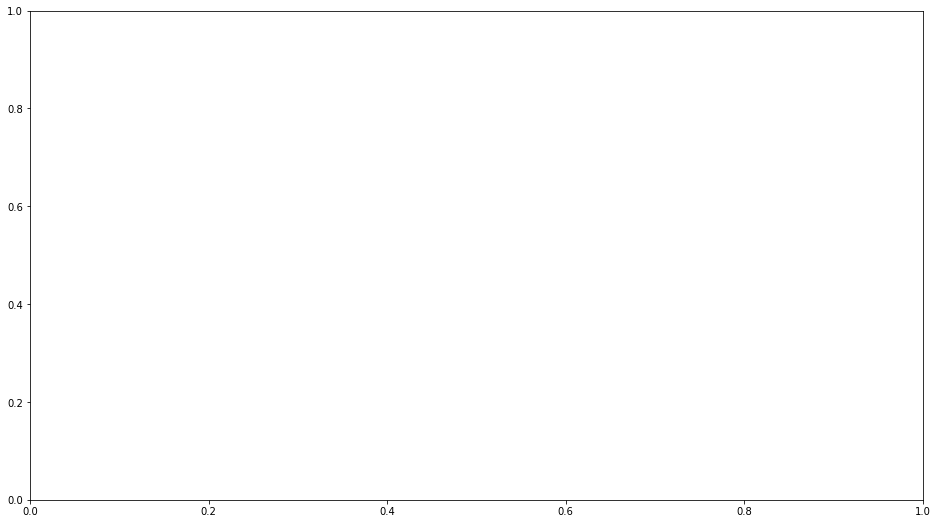

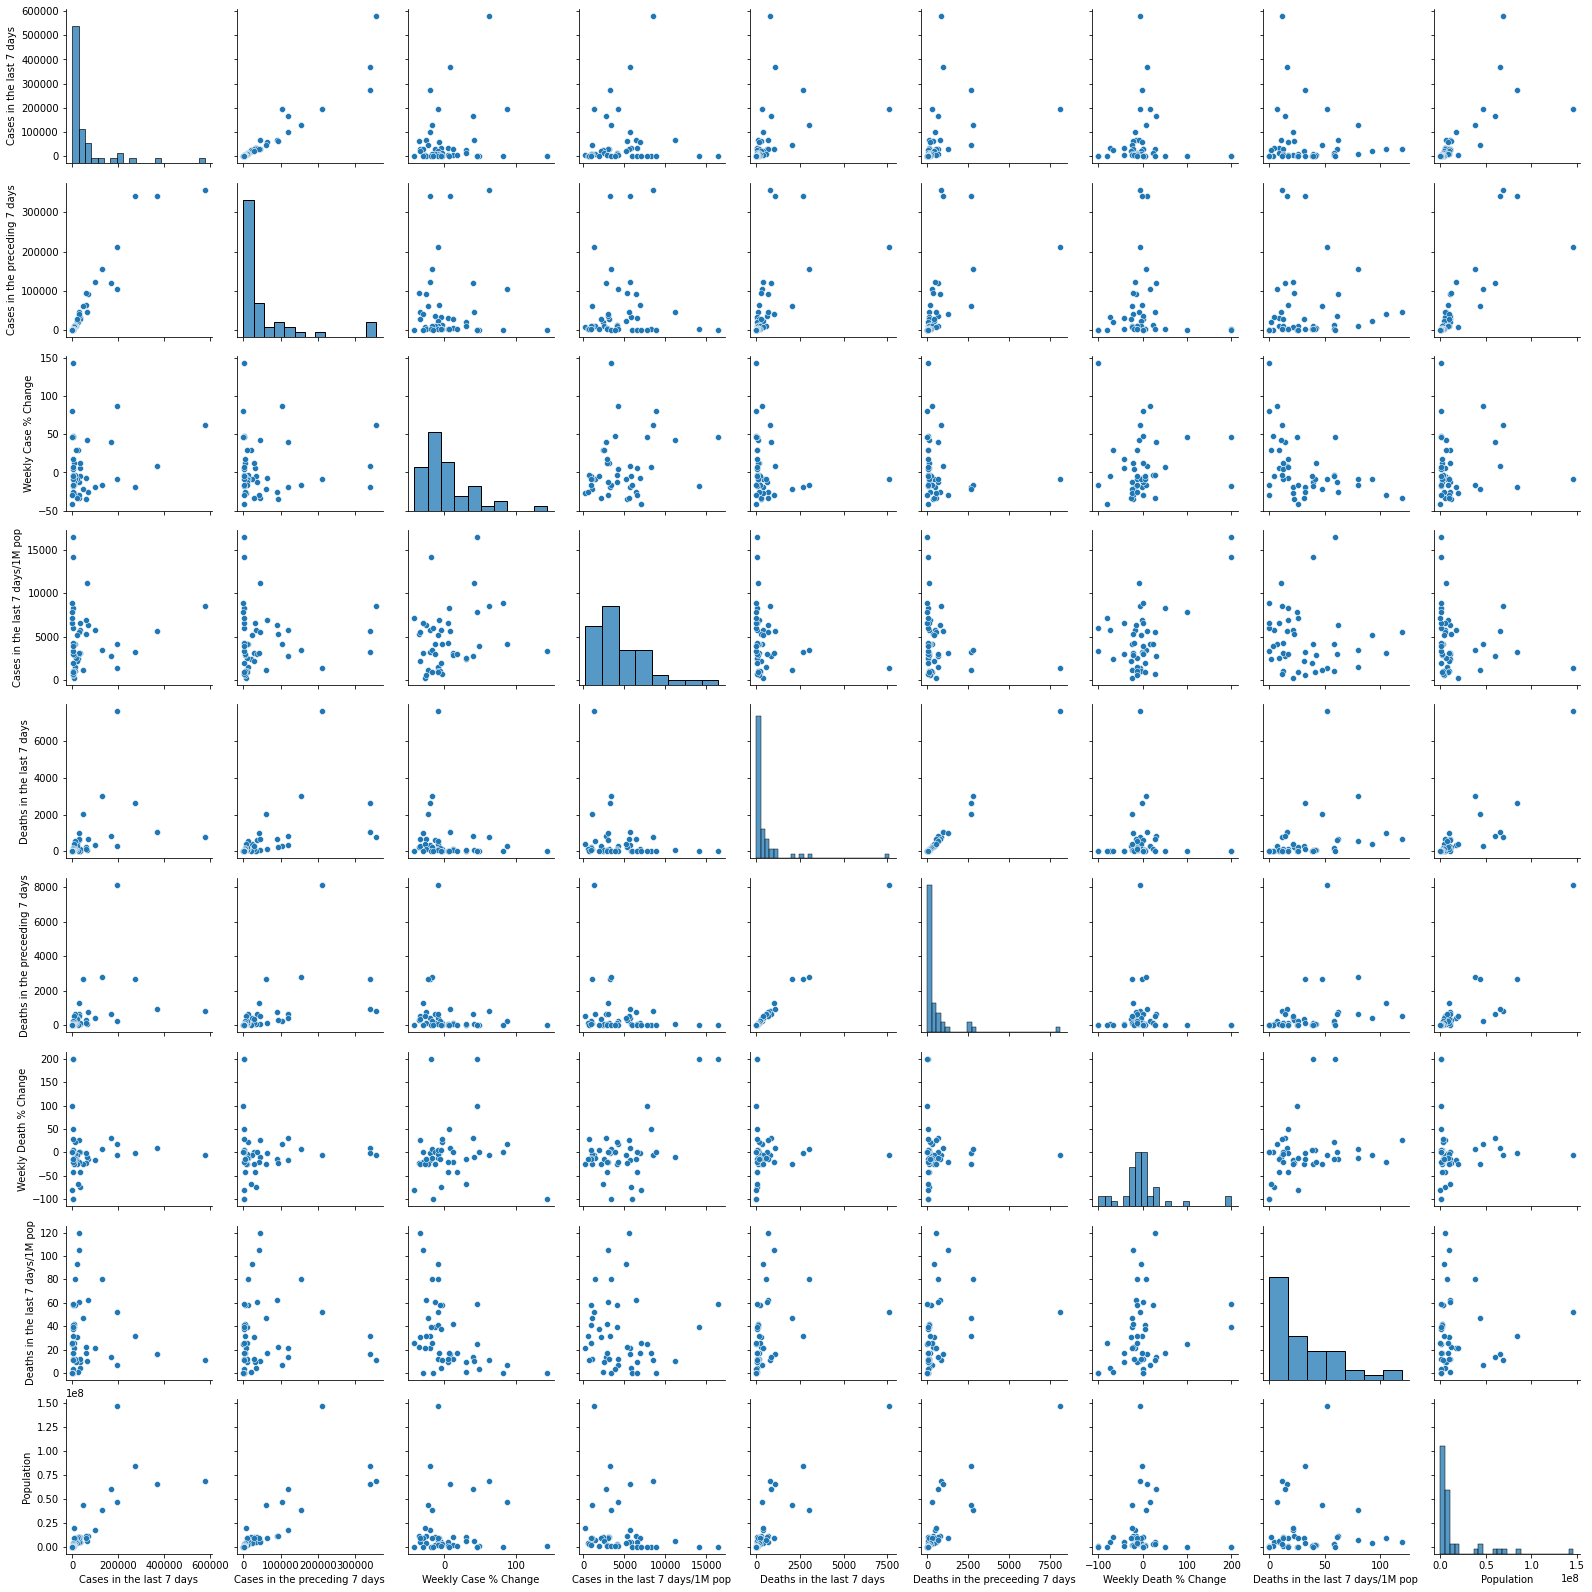

In [7]:
f, ax = plt.subplots(figsize=(16,9))
sns.pairplot(cv)

* Countries

In [8]:
cv["Country, Other"].count()

47

* So this data is collected from 47 European nations

# *Cases in the last 7 days* 

In [9]:
cv[["Country, Other", "Cases in the last 7 days", "Population"]].groupby(["Country, Other"], as_index=False).sum().sort_values("Cases in the last 7 days")

,"Country, Other",Cases in the last 7 days,Population
24,Liechtenstein,271,382
16,Gibraltar,297,33676
29,Monaco,309,39650
12,Faeroe Islands,322,49135
21,Isle of Man,511,85693
38,San Marino,560,34036
1,Andorra,1095,77446
30,Montenegro,1226,628183
19,Iceland,1343,344492
7,Channel Islands,1461,176213


Text(0.5, 0, 'Country/Territory/Region')

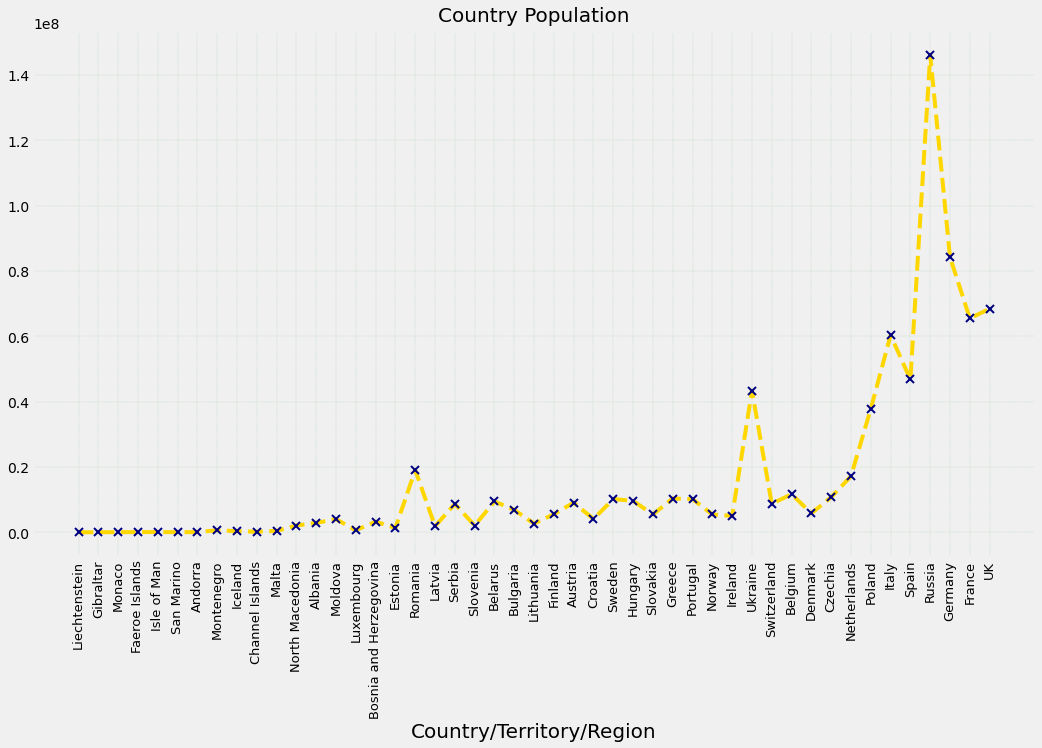

In [10]:
cvlast7=cv[["Country, Other", "Cases in the last 7 days", "Population"]].groupby(["Country, Other"], as_index=False).sum().sort_values("Cases in the last 7 days")
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,9))
plt.plot(cvlast7["Country, Other"], cvlast7["Population"], marker="x", c="gold", mec="navy", ms=8, mew=2, ls="--", lw=4)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.grid(c="g", ls=":", lw=.4, alpha=.4)
plt.title("Country Population", pad=10, fontsize=20, c="black")
plt.xlabel("Country/Territory/Region", fontsize=20)

Text(0.5, 0, 'Country/Territory/Region')

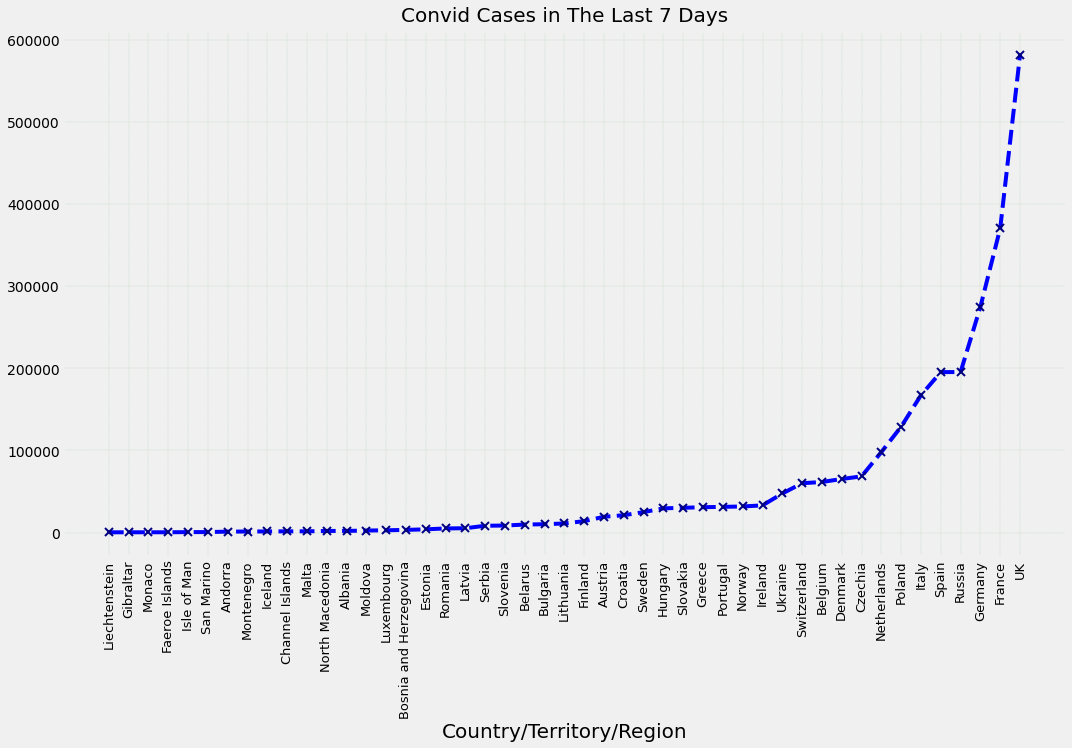

In [11]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,9))
plt.plot(cvlast7["Country, Other"], cvlast7["Cases in the last 7 days"], marker="x", c="b", mec="navy", ms=8, mew=2, ls="--", lw=4)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.grid(c="g", ls=":", lw=.4, alpha=.4)
plt.title("Convid Cases in The Last 7 Days", pad=10, fontsize=20, c="black")
plt.xlabel("Country/Territory/Region", fontsize=20)

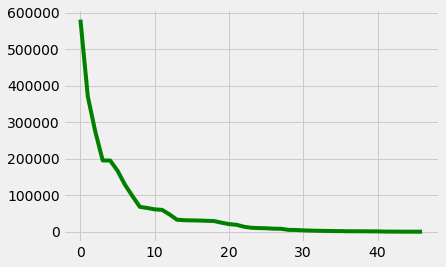

In [12]:
plt.plot(cv["Cases in the last 7 days"], c="g")

# *Covid Cases in the Preceding 7 Days*

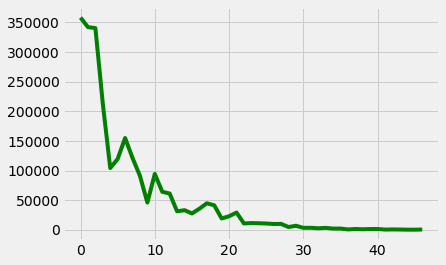

In [13]:
plt.plot(cv["Cases in the preceding 7 days"], c="g")

In [14]:
cv.groupby(["Country, Other", "Population"])["Cases in the preceding 7 days"].sum().to_frame().reset_index().sort_values("Cases in the preceding 7 days")

,"Country, Other",Population,Cases in the preceding 7 days
16,Gibraltar,33676,164
29,Monaco,39650,212
38,San Marino,34036,383
12,Faeroe Islands,49135,456
24,Liechtenstein,382,460
21,Isle of Man,85693,608
27,Malta,443268,609
19,Iceland,344492,905
30,Montenegro,628183,1278
1,Andorra,77446,1336


Text(0.5, 1.0, 'Convid Cases in the Preceding 7 Days')

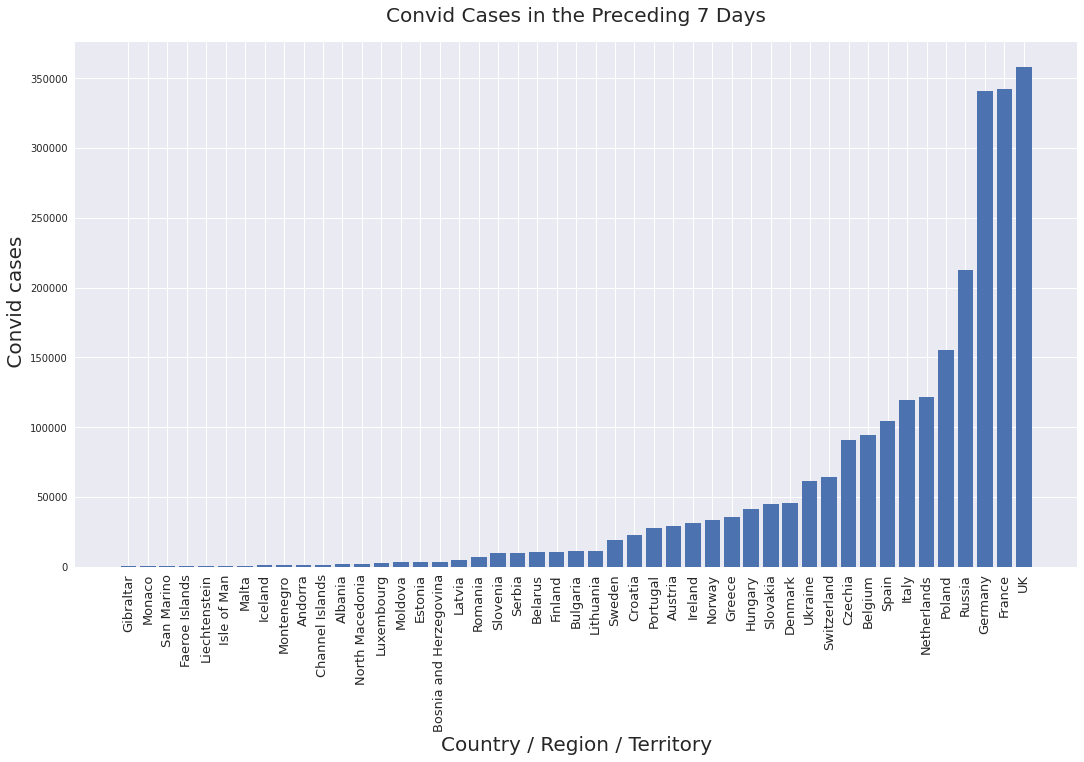

In [15]:
cvpre7=cv.groupby(["Country, Other", "Population"])["Cases in the preceding 7 days"].sum().to_frame().reset_index().sort_values("Cases in the preceding 7 days")
plt.style.use("seaborn")
plt.figure(figsize=(16,9))
plt.bar(cvpre7["Country, Other"], cvpre7["Cases in the preceding 7 days"])
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.xlabel("Country / Region / Territory", fontsize=20)
plt.ylabel(" Convid cases", fontsize=20)
plt.title("Convid Cases in the Preceding 7 Days", pad=20, fontsize=20)

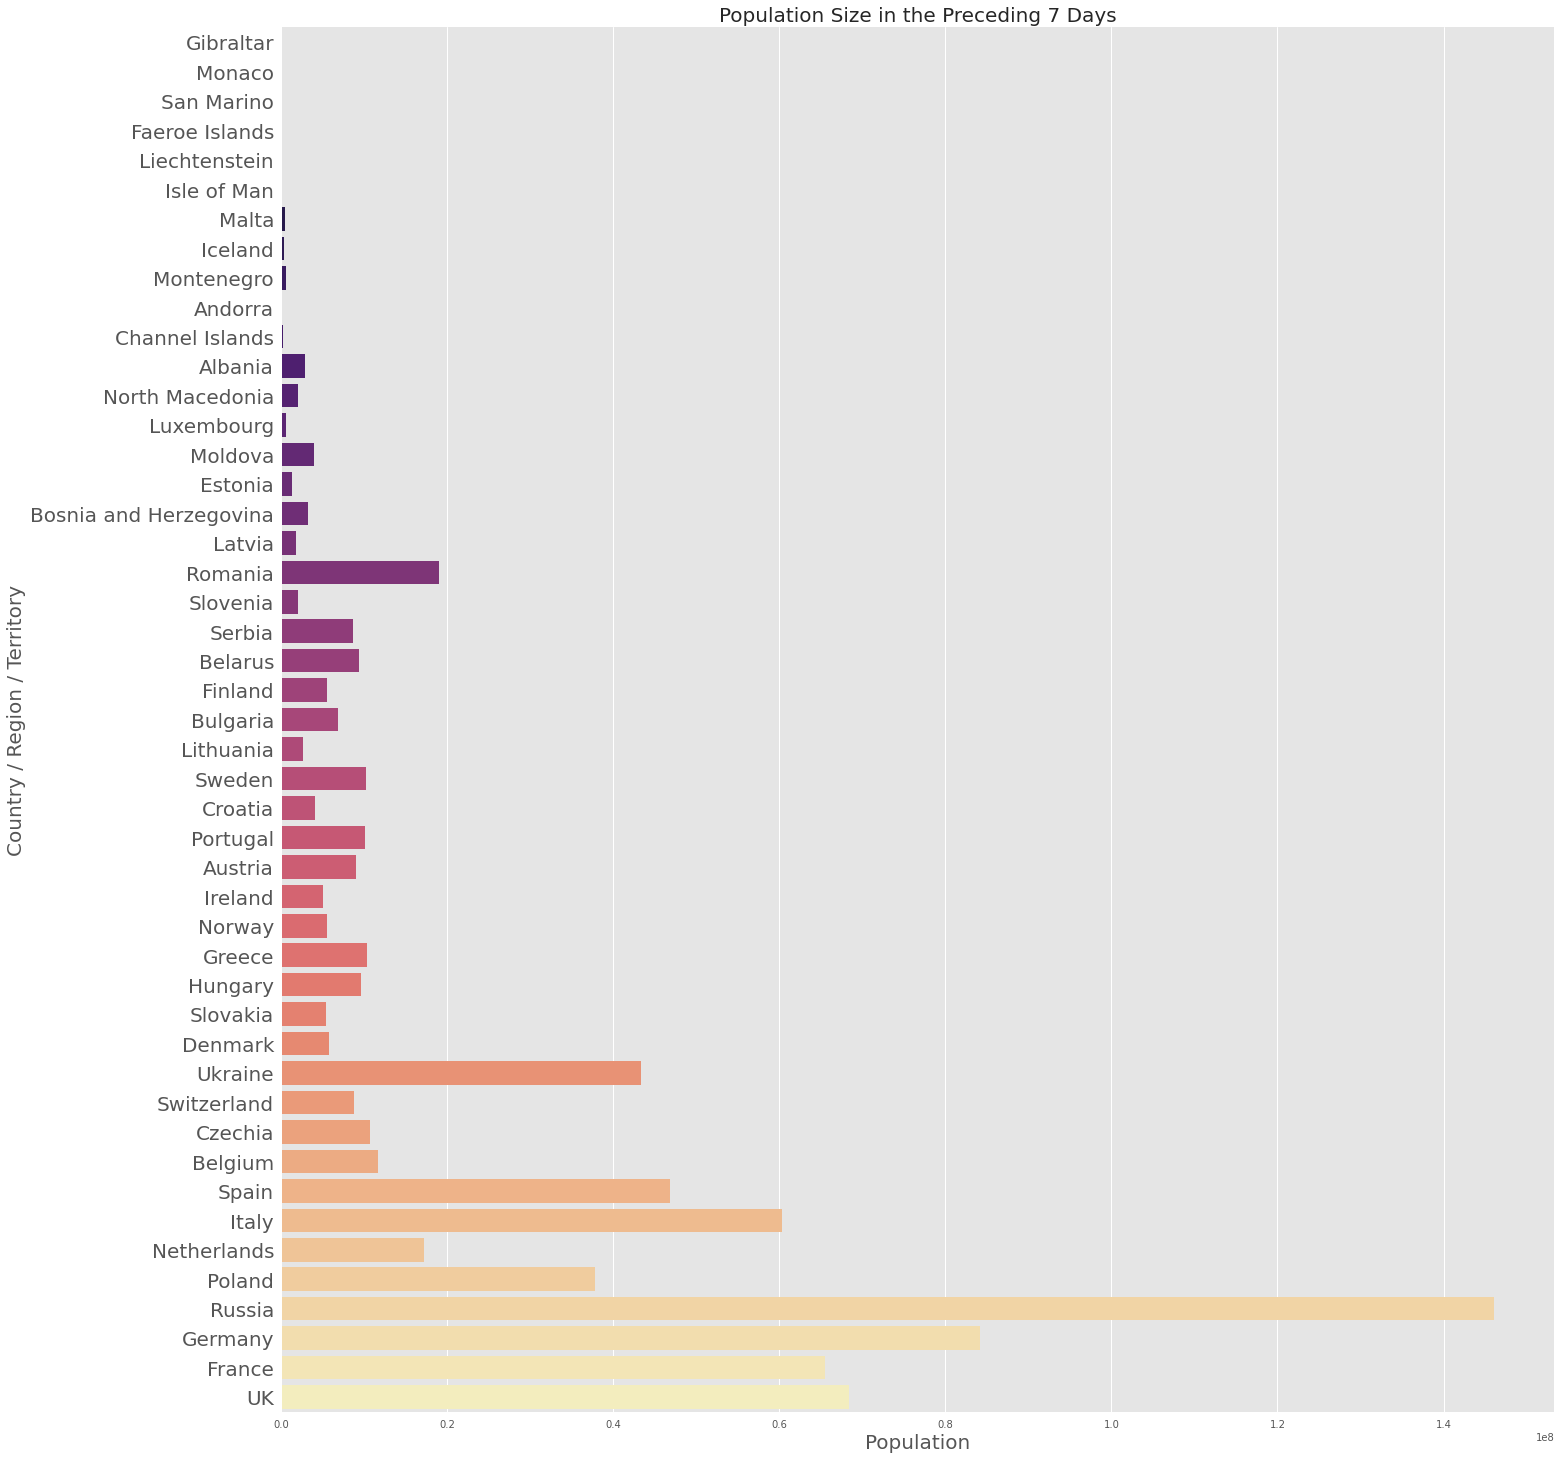

In [16]:
plt.style.use("ggplot")
sns.catplot(x="Population", y="Country, Other", kind="bar", palette="magma", height=20, data=cvpre7)
plt.xlabel("Population", size=20)
plt.ylabel("Country / Region / Territory", size=20)
plt.title("Population Size in the Preceding 7 Days", size=20)
plt.tick_params(axis="y", which="major", labelsize=20)

# *Weekly % Change*

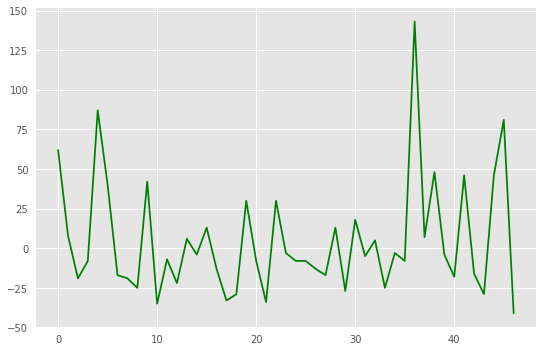

In [17]:
plt.plot(cv["Weekly Case % Change"], c="g")

<AxesSubplot:xlabel='Weekly Case % Change', ylabel='Density'>

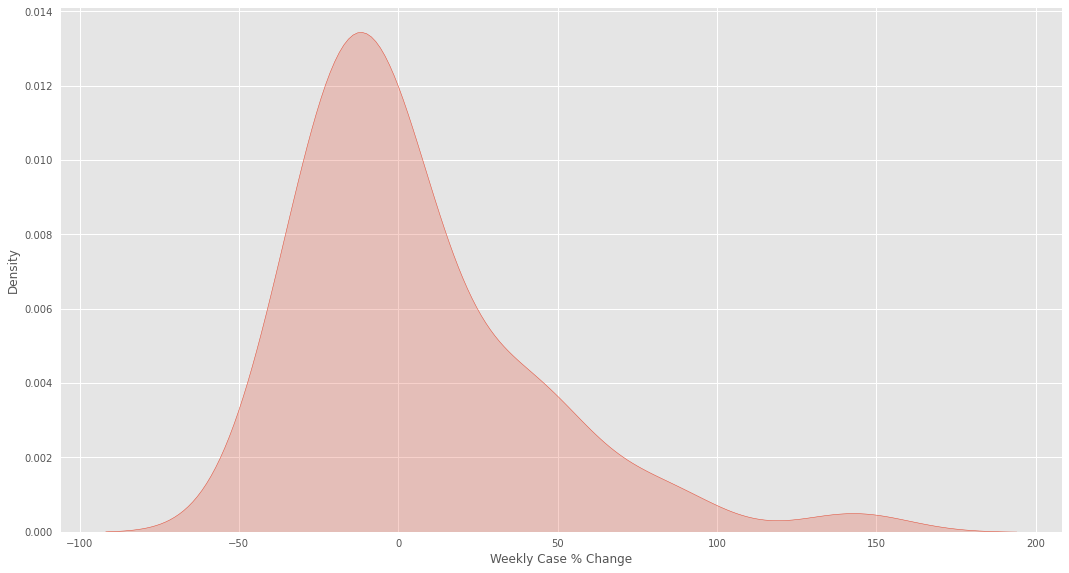

In [18]:
plt.figure(figsize=(16,9))
sns.kdeplot(x=cv["Weekly Case % Change"], shade=True)

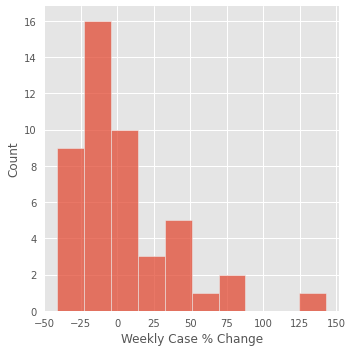

In [19]:
sns.displot(x=cv["Weekly Case % Change"])

# *Cases in the last 7 Days/1M pop*

<AxesSubplot:xlabel='Cases in the last 7 days/1M pop', ylabel='Count'>

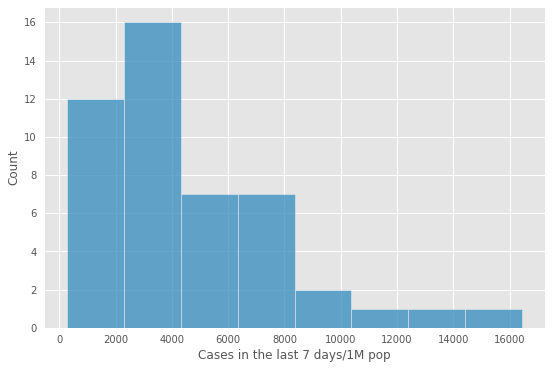

In [20]:
sns.histplot(x=cv["Cases in the last 7 days/1M pop"])

# We will a column that will take a s um of total cases

In [21]:
cv["Total Cases"] = cv["Cases in the last 7 days"] + cv["Cases in the preceding 7 days"]
cv.head()

,"Country, Other",Cases in the last 7 days,Cases in the preceding 7 days,Weekly Case % Change,Cases in the last 7 days/1M pop,Deaths in the last 7 days,Deaths in the preceeding 7 days,Weekly Death % Change,Deaths in the last 7 days/1M pop,Population,Total Cases
0,UK,581035,358200,62.0,8494,784,831,-6.0,11,68409175,939235
1,France,370196,342156,8.0,5653,1043,947,10.0,16,65485446,712352
2,Germany,274730,340547,-19.0,3264,2652,2678,-1.0,32,84177021,615277
3,Russia,195358,212705,-8.0,1338,7618,8142,-6.0,52,146026290,408063
4,Spain,195239,104178,87.0,4173,309,265,17.0,7,46781353,299417


# Which Country has the highest Cases to date?

In [22]:
cv.groupby("Country, Other")["Total Cases"].sum().to_frame().reset_index().sort_values("Total Cases")

,"Country, Other",Total Cases
16,Gibraltar,461
29,Monaco,521
24,Liechtenstein,731
12,Faeroe Islands,778
38,San Marino,943
21,Isle of Man,1119
27,Malta,2090
19,Iceland,2248
1,Andorra,2431
30,Montenegro,2504


Text(0.5, 1.0, 'Total Cases to Date')

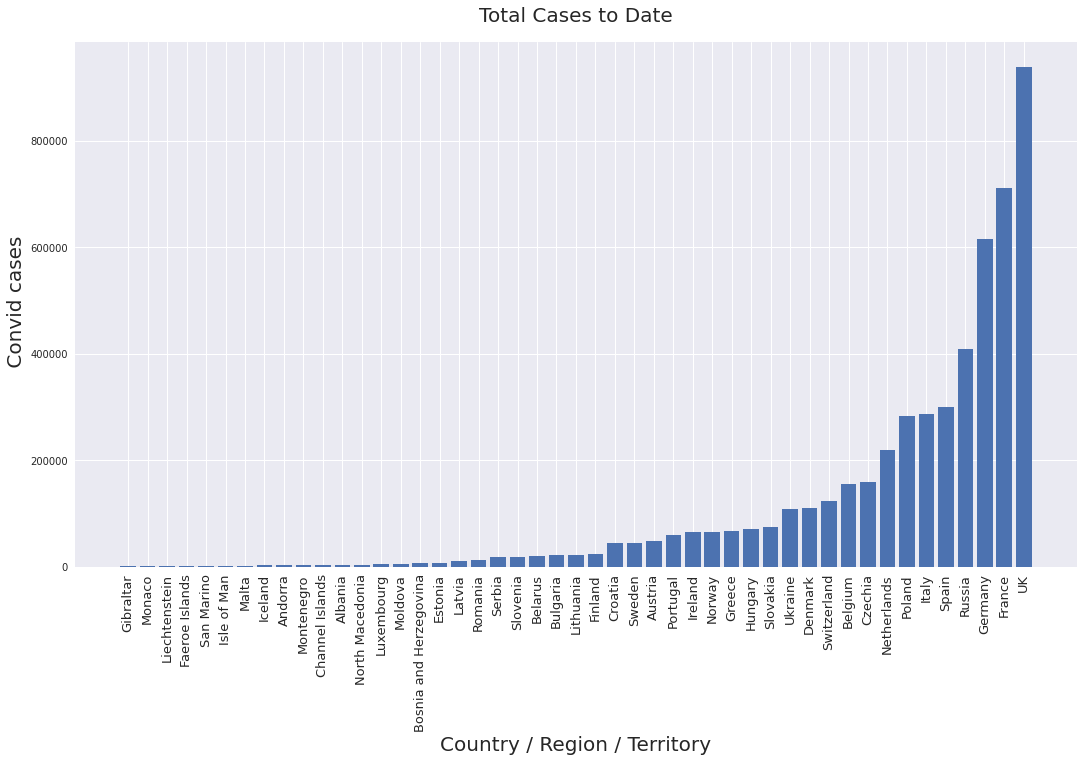

In [23]:
cvt = cv.groupby("Country, Other")["Total Cases"].sum().to_frame().reset_index().sort_values("Total Cases")
plt.style.use("seaborn")
plt.figure(figsize=(16,9))
plt.bar(cvt["Country, Other"], cvt["Total Cases"])
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.xlabel("Country / Region / Territory", fontsize=20)
plt.ylabel(" Convid cases", fontsize=20)
plt.title("Total Cases to Date", pad=20, fontsize=20)

# *Deaths in the last 7 days*

* Total deaths

In [24]:
cv["Deaths in the last 7 days"].sum()

25093

In [25]:
cv.groupby(["Country, Other", "Population"])["Deaths in the last 7 days"].sum().to_frame().reset_index().sort_values("Deaths in the last 7 days")

,"Country, Other",Population,Deaths in the last 7 days
16,Gibraltar,33676,0
21,Isle of Man,85693,0
27,Malta,443268,0
12,Faeroe Islands,49135,0
19,Iceland,344492,1
24,Liechtenstein,382,1
29,Monaco,39650,1
38,San Marino,34036,2
1,Andorra,77446,3
7,Channel Islands,176213,3


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Country /Territory/ Region')

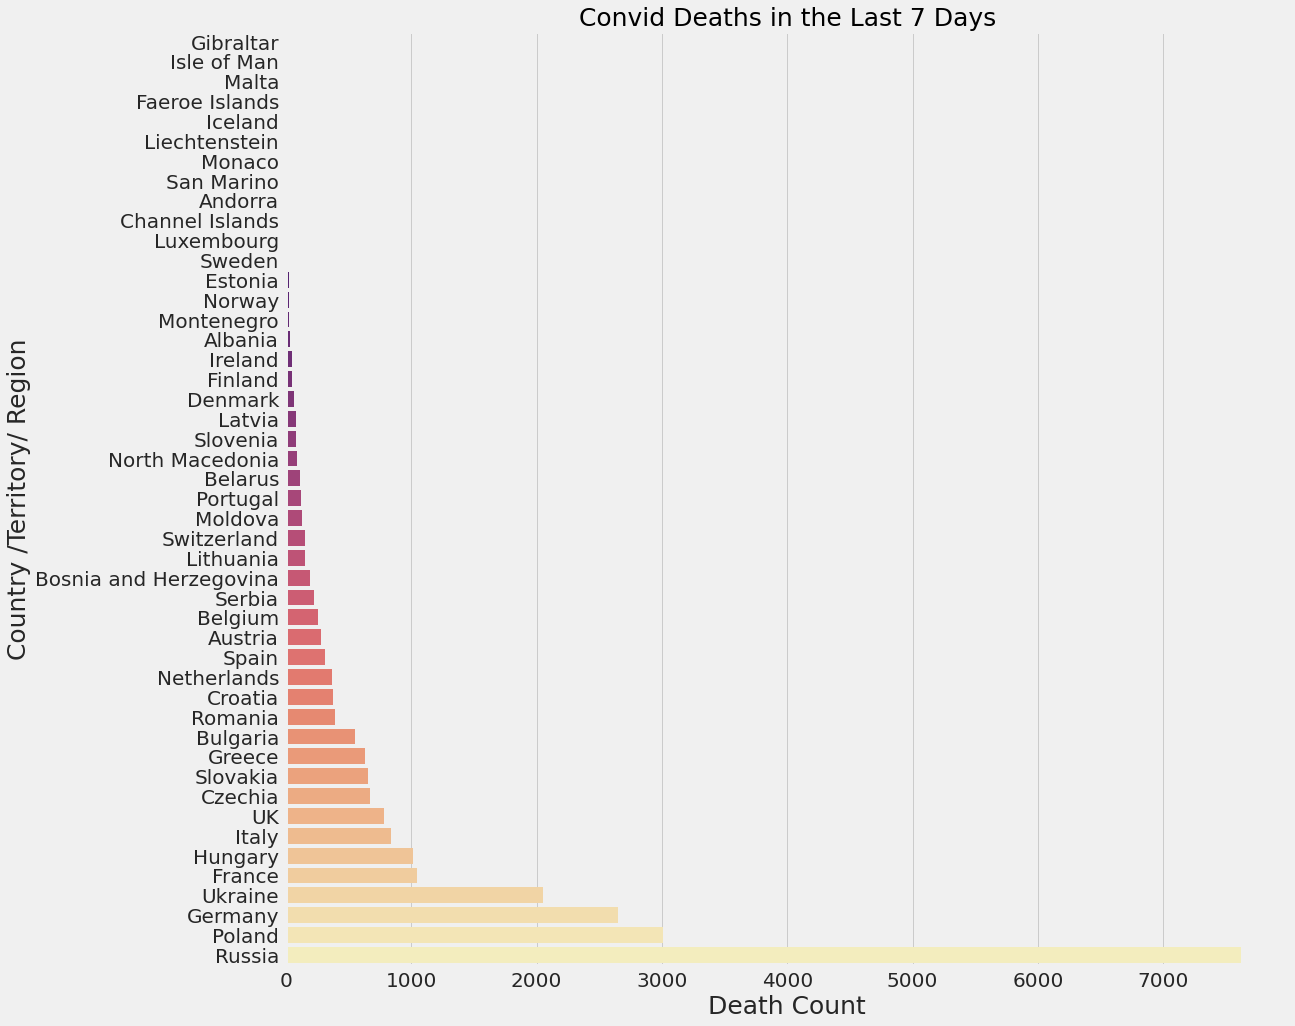

In [26]:
cvla7 = cv.groupby(["Country, Other", "Population"])["Deaths in the last 7 days"].sum().to_frame().reset_index().sort_values("Deaths in the last 7 days")
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,16))
sns.barplot(cvla7["Deaths in the last 7 days"], cvla7["Country, Other"], palette="magma")
plt.tick_params(axis="y", which="major", labelsize=20)
plt.tick_params(axis="x", which="major", labelsize=20)
plt.title("Convid Deaths in the Last 7 Days", fontsize=25, c="black")
plt.xlabel("Death Count", fontsize=25)
plt.ylabel("Country /Territory/ Region", fontsize=25)

Text(0.5, 0, 'Country/Territory/Region')

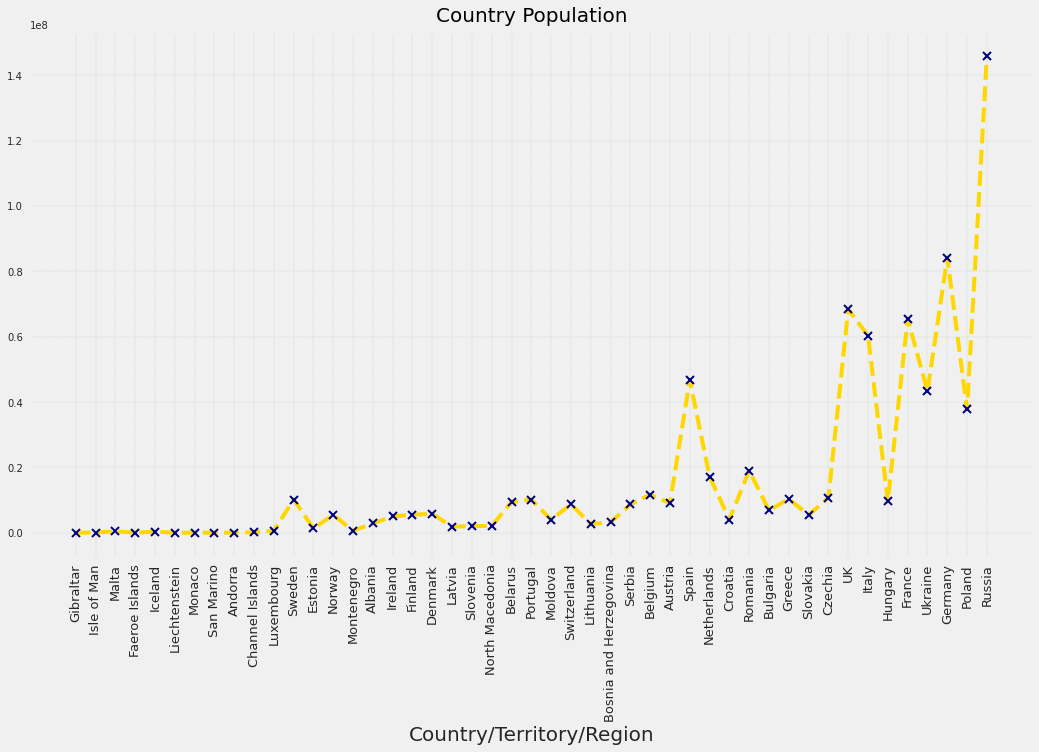

In [27]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,9))
plt.plot(cvla7["Country, Other"], cvla7["Population"], marker="x", c="gold", mec="navy", ms=8, mew=2, ls="--", lw=4)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.grid(c="g", ls=":", lw=.4, alpha=.4)
plt.title("Country Population", pad=10, fontsize=20, c="black")
plt.xlabel("Country/Territory/Region", fontsize=20)

# *Deaths in the Preceding 7 Days*

* Total deaths

In [28]:
cv["Deaths in the preceeding 7 days"].sum()

26762

In [29]:
cv.groupby(["Country, Other", "Population"])["Deaths in the preceeding 7 days"].sum().to_frame().reset_index().sort_values("Deaths in the preceeding 7 days", ascending=False)

,"Country, Other",Population,Deaths in the preceeding 7 days
37,Russia,146026290,8142
34,Poland,37785779,2807
46,Ukraine,43348097,2696
15,Germany,84177021,2678
18,Hungary,9624350,1273
14,France,65485446,947
45,UK,68409175,831
9,Czechia,10738133,791
22,Italy,60331349,642
17,Greece,10348326,629


Text(0, 0.5, 'Death Count')

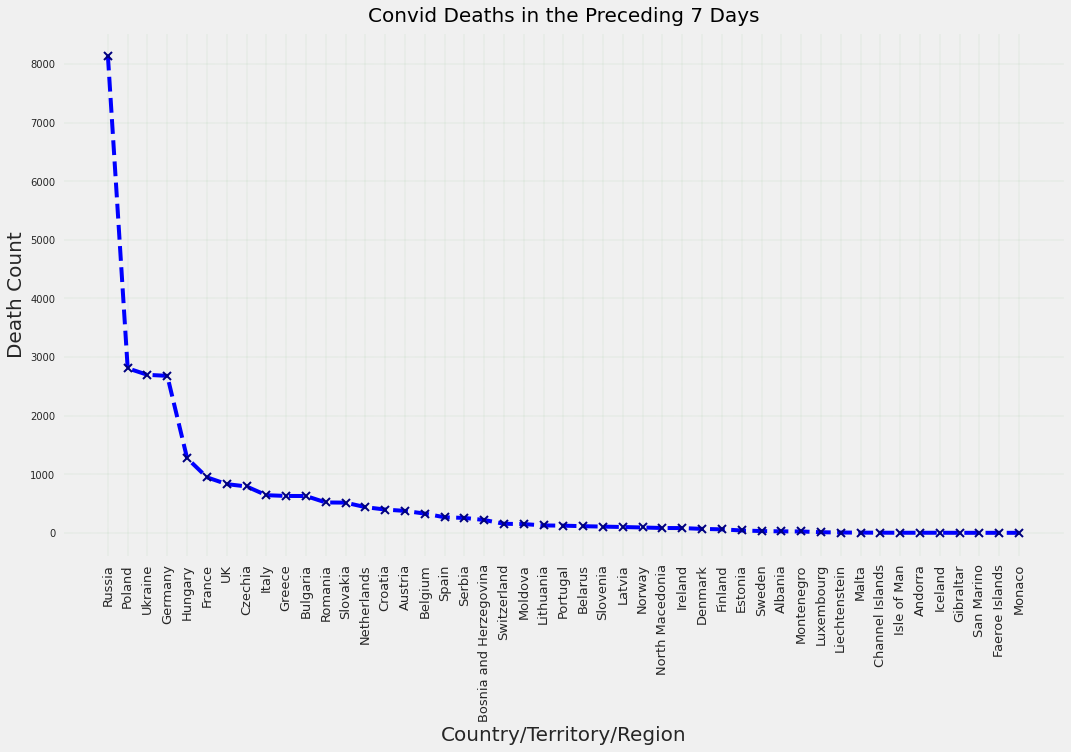

In [30]:
cvpr7=cv.groupby(["Country, Other", "Population"])["Deaths in the preceeding 7 days"].sum().to_frame().reset_index().sort_values("Deaths in the preceeding 7 days", ascending=False)
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,9))
plt.plot(cvpr7["Country, Other"], cvpr7["Deaths in the preceeding 7 days"], marker="x", c="blue", mec="navy", ms=8, mew=2, ls="--", lw=4)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.grid(c="g", ls=":", lw=.4, alpha=.4)
plt.title("Convid Deaths in the Preceding 7 Days", pad=10, fontsize=20, c="black")
plt.xlabel("Country/Territory/Region", fontsize=20)
plt.ylabel("Death Count", fontsize=20)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Convid Deaths in the Preceding 7 Days')

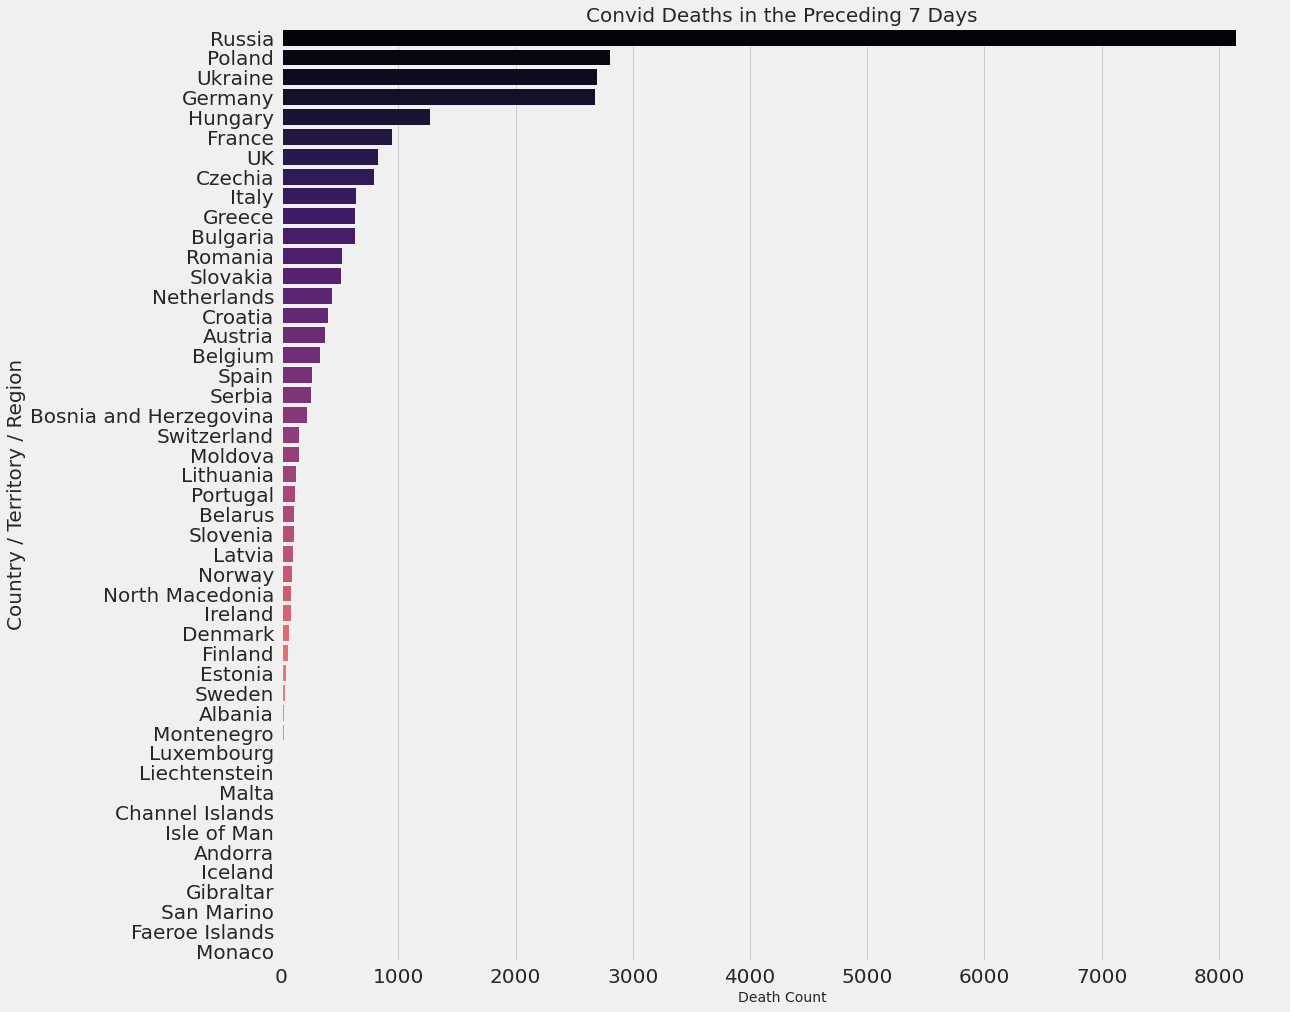

In [31]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,16))
sns.barplot(cvpr7["Deaths in the preceeding 7 days"], cvpr7["Country, Other"], palette="magma")
plt.tick_params(axis="x", which="major", labelsize=20)
plt.tick_params(axis="y", which="major", labelsize=20)
plt.xlabel("Death Count", fontsize=14)
plt.ylabel("Country / Territory / Region", fontsize=20)
plt.title("Convid Deaths in the Preceding 7 Days", fontsize=20)

# The total deaths 

In [32]:
cv["Total Deaths"] = cv["Deaths in the last 7 days"] + cv["Deaths in the preceeding 7 days"]

In [33]:
cv.head()

,"Country, Other",Cases in the last 7 days,Cases in the preceding 7 days,Weekly Case % Change,Cases in the last 7 days/1M pop,Deaths in the last 7 days,Deaths in the preceeding 7 days,Weekly Death % Change,Deaths in the last 7 days/1M pop,Population,Total Cases,Total Deaths
0,UK,581035,358200,62.0,8494,784,831,-6.0,11,68409175,939235,1615
1,France,370196,342156,8.0,5653,1043,947,10.0,16,65485446,712352,1990
2,Germany,274730,340547,-19.0,3264,2652,2678,-1.0,32,84177021,615277,5330
3,Russia,195358,212705,-8.0,1338,7618,8142,-6.0,52,146026290,408063,15760
4,Spain,195239,104178,87.0,4173,309,265,17.0,7,46781353,299417,574


# Which Country has the highest death count?

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Total Deaths')

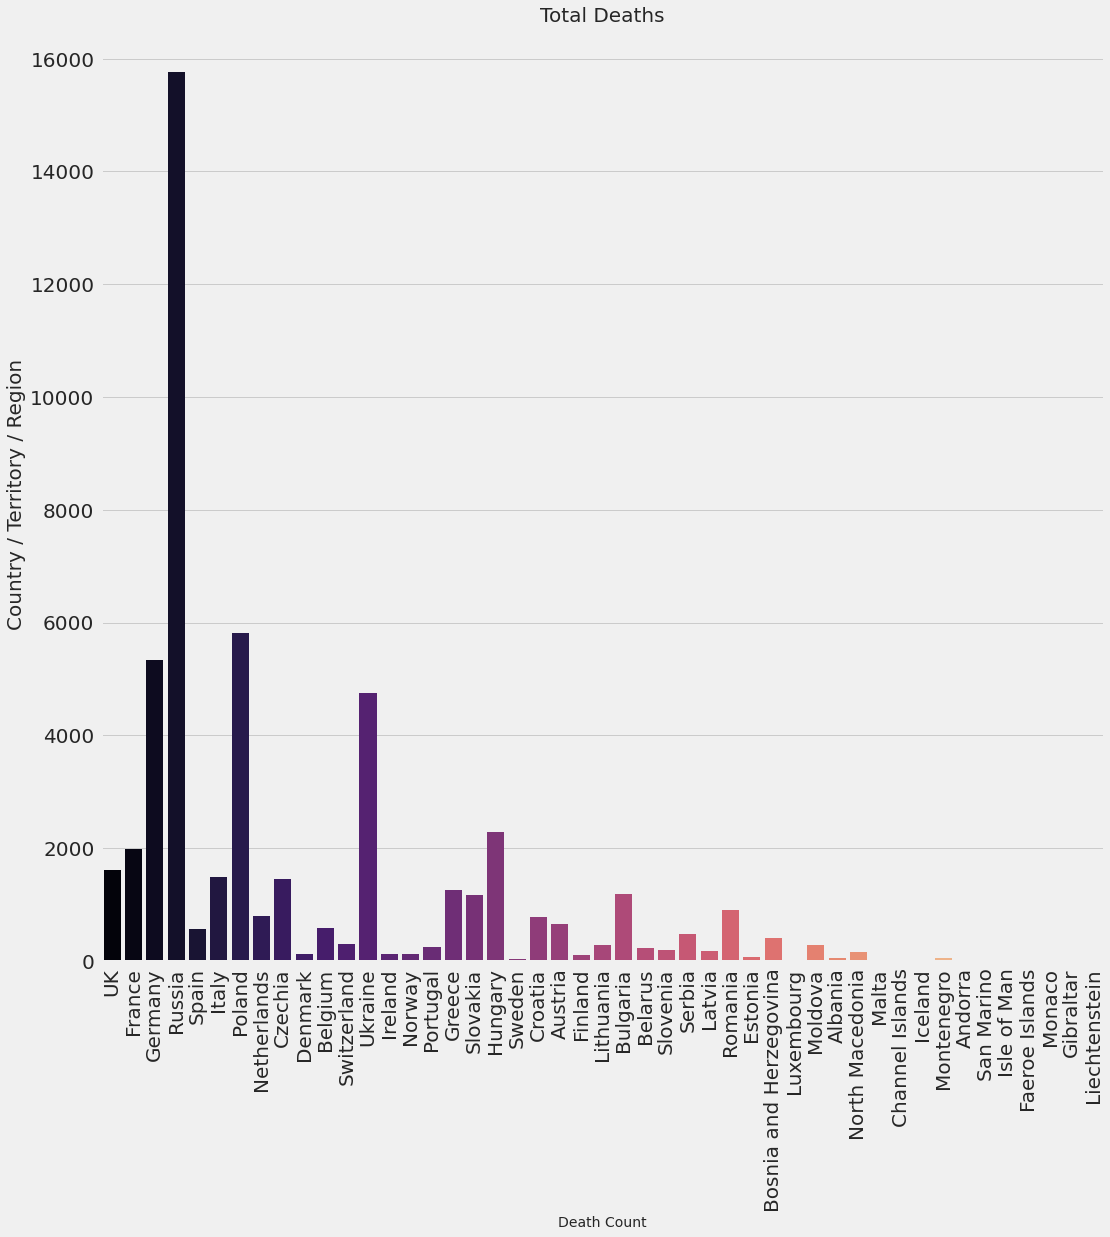

In [34]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,16))
sns.barplot(cv["Country, Other"], cv["Total Deaths"], palette="magma")
plt.tick_params(axis="x", which="major", labelsize=20, rotation=90)
plt.tick_params(axis="y", which="major", labelsize=20)
plt.xlabel("Death Count", fontsize=14)
plt.ylabel("Country / Territory / Region", fontsize=20)
plt.title("Total Deaths", fontsize=20)

# *Weekly Death % Change*

<AxesSubplot:xlabel='Weekly Death % Change', ylabel='Density'>

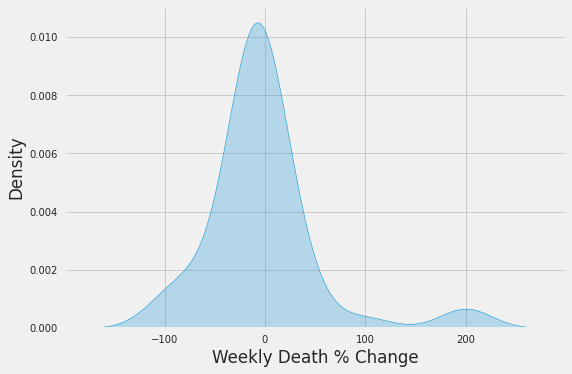

In [35]:
sns.kdeplot(x=cv["Weekly Death % Change"], shade=True)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

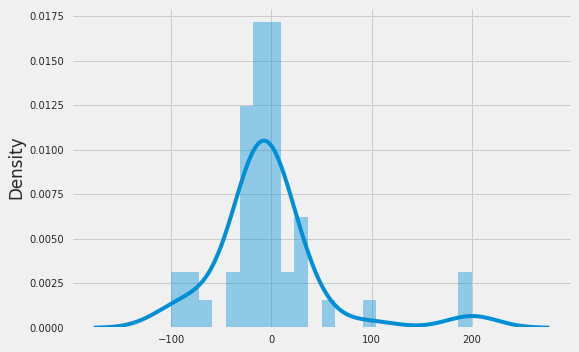

In [36]:
sns.distplot(x=cv["Weekly Death % Change"])

# Deaths in the Last 7 days/1M pop

<AxesSubplot:xlabel='Deaths in the last 7 days/1M pop', ylabel='Density'>

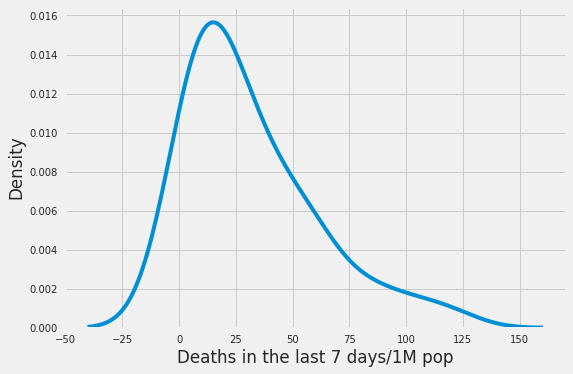

In [37]:
sns.kdeplot(x=cv["Deaths in the last 7 days/1M pop"], shade=False)

# Total Deaths vs Total Cases

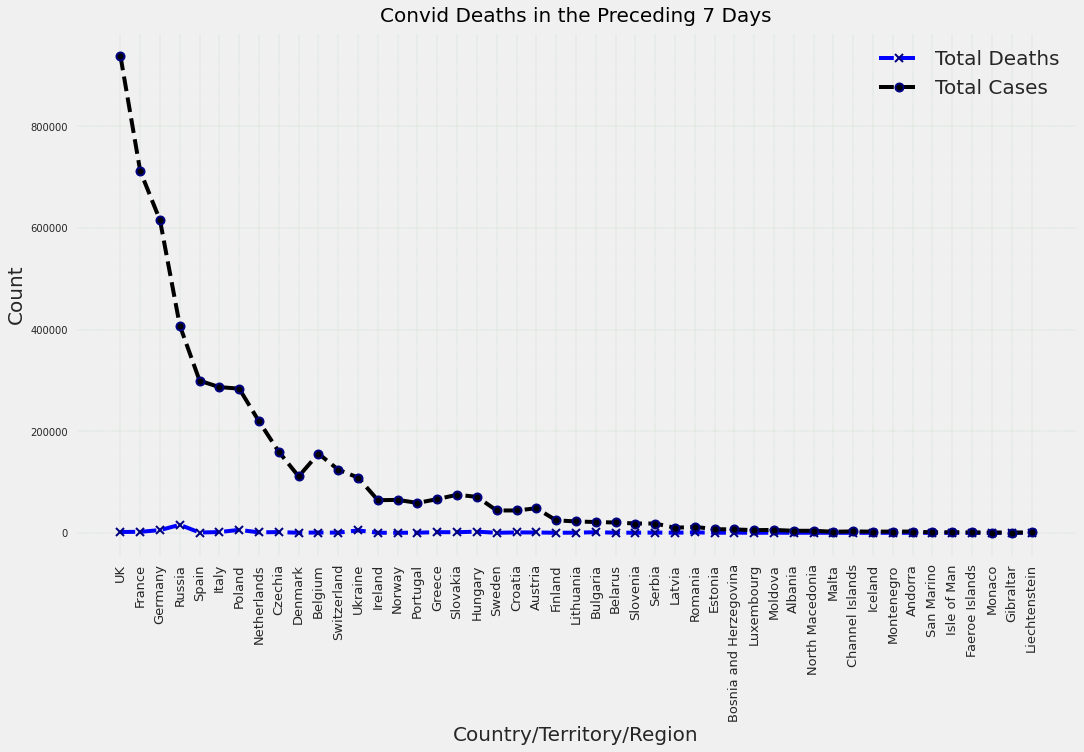

In [38]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,9))
plt.plot(cv["Country, Other"], cv["Total Deaths"], marker="x", c="blue", mec="navy", ms=8, mew=2, ls="--", lw=4)
plt.plot(cv["Country, Other"], cv["Total Cases"], marker="o", c="black", mec="navy", ms=8, mew=2, ls="--", lw=4)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.grid(c="g", ls=":", lw=.4, alpha=.4)
plt.title("Convid Deaths in the Preceding 7 Days", pad=10, fontsize=20, c="black")
plt.xlabel("Country/Territory/Region", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.legend(["Total Deaths","Total Cases"], fontsize=20)